In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'bmh' ) 

import pickle
import pandas 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.cross_validation import cross_val_predict, cross_val_score, StratifiedKFold
import numpy as np 
from scipy.stats import pearsonr
from sklearn.ensemble import BaggingRegressor

In [10]:
# load in the pickled regression problems 

with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 
    
tm_combos = []
for combo in combos:
    if combo[1] == 'tm':
        print( combo[0], combo[1] ) 
        tm_combos.append( combo ) 

benchmark tm
ddg_monomer tm
pssm tm


Assing how they do on their own temrs, ie the predicted stabilt, hoe does it correlate? 

In [ ]:
fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(5,8), sharex=True )
#for name, target, X, y, support, corr_to_target in tm_combos:
for i in range( 3 ):
    combo = tm_combos[i]
    df = pandas.DataFrame( combo[2], columns=combo[4] )
    ax[0].scatter( combo[3], df[ combo[5].idxmax() ], color=colors[i] )

ax[0].plot( ( -8, 8 ), ( -8, 8 ), '--', linewidth=0.3, color='gray' ) 
ax[0].legend( [ 'Perfect prediction (PCC 1 or -1)' ] + sets, loc='upper center', bbox_to_anchor=(0.5, 1.2), fontsize=10 )
ax[0].set_xlim( ( -8, 8 ) ) 
ax[0].set_ylim( ( -8, 8 ) ) 
ax[0].set_ylabel( 'Predicted free energy change' ) 

ax[1].hist( tm_combos[0][3], color='gray', bins=50 ) 
ax[1].set_xlabel( 'Measured $T_m$ (˚C)' ) 
ax[1].set_ylabel( 'Frequency in BglB data set' )

fig.tight_layout()

In [11]:
colors = [ 'black', 'red', 'brown' ] 
sets = [ 'RosettaDesign (REU), PCC -0.28', 'ddg_monomer (REU), PCC 0.29', 'FoldX (kcal/mol), PCC -0.30' ]

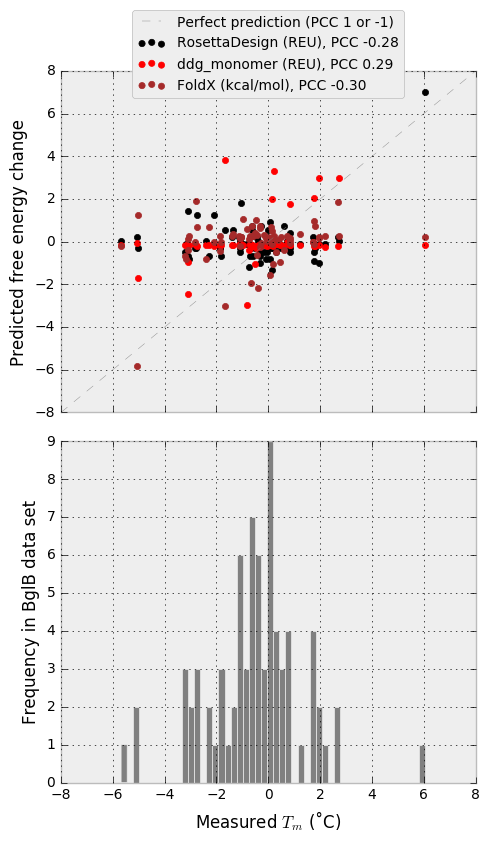

In [12]:
fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(5,8), sharex=True )
#for name, target, X, y, support, corr_to_target in tm_combos:
for i in range( 3 ):
    combo = tm_combos[i]
    df = pandas.DataFrame( combo[2], columns=combo[4] )
    ax[0].scatter( combo[3], df[ combo[5].idxmax() ], color=colors[i] )

ax[0].plot( ( -8, 8 ), ( -8, 8 ), '--', linewidth=0.3, color='gray' ) 
ax[0].legend( [ 'Perfect prediction (PCC 1 or -1)' ] + sets, loc='upper center', bbox_to_anchor=(0.5, 1.2), fontsize=10 )
ax[0].set_xlim( ( -8, 8 ) ) 
ax[0].set_ylim( ( -8, 8 ) ) 
ax[0].set_ylabel( 'Predicted free energy change' ) 

ax[1].hist( tm_combos[0][3], color='gray', bins=50 ) 
ax[1].set_xlabel( 'Measured $T_m$ (˚C)' ) 
ax[1].set_ylabel( 'Frequency in BglB data set' )

fig.tight_layout()

## Comparison of the performance of 7 feature sets in predicting experimental targets T$_m$, _k_<sub>cat</sub>, K<sub>M</sub>, _k_<sub>cat</sub>/K<sub>M</sub>

Here, we compare the performance of elastic net using each of 6 feature sets, ranging in number of features from 17 to 60.

/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:920: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


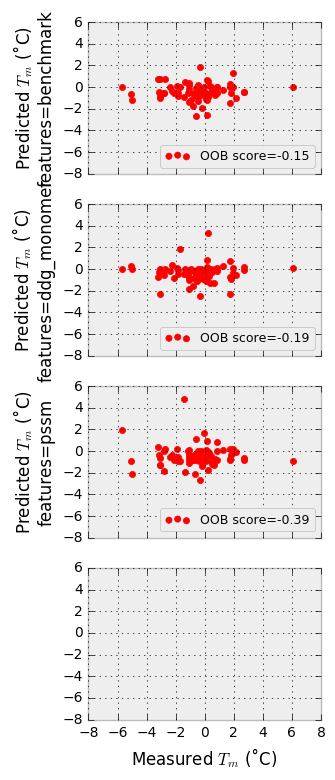

In [13]:
fig, ax = plt.subplots( nrows=4, ncols=1, figsize=(3,9), sharex=True, sharey=True )
for i, ( name, target, X, y, support, corr_to_target ) in enumerate( tm_combos ):
    # fit 
    skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
    net = ElasticNetCV( cv=skf, max_iter=1e9, selection='random' ) 
    bag = BaggingRegressor( net, n_estimators=5, n_jobs=-1, oob_score=True ) 
    bag.fit( X, y ) 

    # plot 
    fig.axes[ i ].scatter( y, bag.oob_prediction_, color='red' )
    fig.axes[ i ].legend( [ 'OOB score={0:.2f}'.format( bag.oob_score_ ) ], loc='lower right', fontsize='9' ) 
    fig.axes[ i ].set_ylabel( 'Predicted $T_m$ (˚C)\nfeatures={}'.format( name ) ) 

fig.axes[ 3 ].set_xlabel( 'Measured $T_m$ (˚C)'.format( target ) ) 
#fig.tight_layout()
fig.show()